In [8]:
# usaremos la implementacion base de svd
from scipy.linalg import svd # https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html
# por otro lado hay otras opciones como svds 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.svds.html 
from scipy.sparse.linalg import svds
# la usaremos para verificar el calculo de autovalores/eigenvalues
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigs.html
from scipy.sparse.linalg import eigs

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn import manifold
from sklearn.metrics import euclidean_distances

import scipy.io
import pandas as pd

In [9]:
A = np.matrix([[3,1,1,0],[2,1,0,2],[3,3,0,1],[0,1,2,0],[2,0,0,2]])

In [10]:
A.shape

(5, 4)

In [11]:
u, s, vt = svd(A)

In [12]:
u.shape

(5, 5)

In [13]:
s.shape

(4,)

In [14]:
vt.shape

(4, 4)

In [15]:
k = 3
reconstA = np.matrix(u[:, :k]) * np.diag(s[:k]) * np.matrix(vt[:k, :])

In [16]:
reconstA

matrix([[ 2.28110587e+00,  1.67065375e+00,  1.05370736e+00,
          6.80331964e-01],
        [ 2.29789742e+00,  7.22092572e-01, -2.22554119e-02,
          1.71808208e+00],
        [ 3.26882758e+00,  2.74921172e+00, -2.00836537e-02,
          7.45592585e-01],
        [ 3.90519129e-01,  6.35686110e-01,  1.97082498e+00,
         -3.69571310e-01],
        [ 1.96129065e+00,  3.61118171e-02,  2.89191033e-03,
          2.03663295e+00]])

In [17]:
centered = ((A  - A.mean()))
centered

matrix([[ 1.8, -0.2, -0.2, -1.2],
        [ 0.8, -0.2, -1.2,  0.8],
        [ 1.8,  1.8, -1.2, -0.2],
        [-1.2, -0.2,  0.8, -1.2],
        [ 0.8, -1.2, -1.2,  0.8]])

In [18]:
M = np.matrix([[0,1337,938,840,647,748,984,578,987,800,2505], 
           [1337,0,749,1005,810,1017,1026,1385,1661,1860,3068],
           [938,749,0,262,825,1116,1271,1297,1693,1687,2978], 
           [840,1005,262,0,920,1198,1385,1296,1712,1630,2919],
           [647,810,825,920,0,291,467,579,909,1051,2284], 
           [748,1017,1116,1198,291,0,236,414,648,887,2051],
           [984,1026,1271,1385,467,236,0,586,677,1022,2083], 
           [578,1385,1297,1296,579,414,586,0,421,480,1713], 
           [987,1661,1693,1712,909,648,677,421,0,479,1412], 
           [800,1860,1687,1630,1051,887,1022,480,479,0,1292], 
           [2505,3068,2978,2919,2284,2051,2083,1713,1412,1292,0]]) 

In [19]:
M

matrix([[   0, 1337,  938,  840,  647,  748,  984,  578,  987,  800,
         2505],
        [1337,    0,  749, 1005,  810, 1017, 1026, 1385, 1661, 1860,
         3068],
        [ 938,  749,    0,  262,  825, 1116, 1271, 1297, 1693, 1687,
         2978],
        [ 840, 1005,  262,    0,  920, 1198, 1385, 1296, 1712, 1630,
         2919],
        [ 647,  810,  825,  920,    0,  291,  467,  579,  909, 1051,
         2284],
        [ 748, 1017, 1116, 1198,  291,    0,  236,  414,  648,  887,
         2051],
        [ 984, 1026, 1271, 1385,  467,  236,    0,  586,  677, 1022,
         2083],
        [ 578, 1385, 1297, 1296,  579,  414,  586,    0,  421,  480,
         1713],
        [ 987, 1661, 1693, 1712,  909,  648,  677,  421,    0,  479,
         1412],
        [ 800, 1860, 1687, 1630, 1051,  887, 1022,  480,  479,    0,
         1292],
        [2505, 3068, 2978, 2919, 2284, 2051, 2083, 1713, 1412, 1292,
            0]])

In [20]:
cities = pd.DataFrame(M)

In [21]:
cities -= cities.mean()
# y calculamos la matriz de distancias via sklearn
distances = euclidean_distances(cities)
distances

array([[   0.        , 2506.96469859, 2171.37928515, 2077.90158573,
        1314.60298189, 1556.59821406, 1749.06346369, 1527.05369912,
        2208.83566614, 2159.08499138, 5597.01214935],
       [2506.96469859,    0.        , 1396.45980966, 1662.4057868 ,
        2263.87610085, 2725.97248702, 2579.45362432, 3268.96176178,
        3588.57673737, 3731.40188133, 5802.80957813],
       [2171.37928515, 1396.45980966,    0.        ,  498.26197928,
        2286.03783871, 2863.97555855, 2873.05534231, 3265.77295598,
        3731.89697071, 3737.12804169, 6058.06561536],
       [2077.90158573, 1662.4057868 ,  498.26197928,    0.        ,
        2376.50583841, 2922.27086356, 2941.13005493, 3233.64438366,
        3677.90075994, 3627.11662344, 5907.57259795],
       [1314.60298189, 2263.87610085, 2286.03783871, 2376.50583841,
           0.        ,  783.75314991, 1053.41539765, 1513.1239209 ,
        2270.93196728, 2534.61259367, 5909.44599772],
       [1556.59821406, 2725.97248702, 2863.9755585

In [22]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(distances).embedding_
pos

array([[ -110.46258011,   315.41497683],
       [-1109.75222692,  2038.4191112 ],
       [  -99.74202714,  2196.90566094],
       [  256.11065595,  2108.0731741 ],
       [-1273.70044982,   174.84295031],
       [-1217.2172582 ,  -474.8587447 ],
       [-1222.4271971 ,  -677.52733934],
       [ -524.09280742, -1120.19432737],
       [   75.84259525, -1656.55874092],
       [  690.47403897, -1459.43464336],
       [ 4534.96725655, -1445.08207771]])

/home/kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


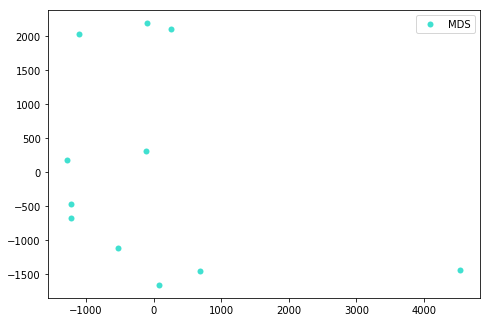

In [23]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', lw=0, label='MDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

distances = distances.max() / distances * 100
distances[np.isinf(distances)] = 0

plt.show()



In [24]:
'''fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])
labels = range(1, distances.shape[0] + 1)

fig.suptitle('Ciudades')

plt.scatter(distances[:, 0], distances[:, 1], color='turquoise', lw=0, label='MDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

distances = distances.max() / distances * 100
distances[np.isinf(distances)] = 0

for i, txt in enumerate(labels):
    ax.annotate(txt, (distances[i,0], distances[i,1])) '''

"fig = plt.figure(1)\nax = plt.axes([0., 0., 1., 1.])\nlabels = range(1, distances.shape[0] + 1)\n\nfig.suptitle('Ciudades')\n\nplt.scatter(distances[:, 0], distances[:, 1], color='turquoise', lw=0, label='MDS')\nplt.legend(scatterpoints=1, loc='best', shadow=False)\n\ndistances = distances.max() / distances * 100\ndistances[np.isinf(distances)] = 0\n\nfor i, txt in enumerate(labels):\n    ax.annotate(txt, (distances[i,0], distances[i,1])) "

In [70]:
usuarios = [ {5,2,1,5}, {4,5,2,3} ,{2,5,5,1},{5,3,1,5},{3,4,5,2},{1,4,3,5} ]

In [71]:
distUser = np.empty((len(usuarios), len(usuarios))) 
count =0
for w in range (0,len(usuarios)):
    for i in range (0,len(usuarios)):
            distUser[w][i] = 1 - len(usuarios[w] & usuarios [i]) / len(usuarios[w] | usuarios [i])
        

In [72]:
distUser

array([[0.  , 0.6 , 0.  , 0.5 , 0.6 , 0.6 ],
       [0.6 , 0.  , 0.6 , 0.6 , 0.  , 0.4 ],
       [0.  , 0.6 , 0.  , 0.5 , 0.6 , 0.6 ],
       [0.5 , 0.6 , 0.5 , 0.  , 0.6 , 0.25],
       [0.6 , 0.  , 0.6 , 0.6 , 0.  , 0.4 ],
       [0.6 , 0.4 , 0.6 , 0.25, 0.4 , 0.  ]])